# Assignment 12 - Principal Component Analysis

### David Miller and Joshua Gonzalez

The goal of this assignment is to gain experience with Unsupervised Dimensionality Reduction techniques, specifically Principal Component Analysis, or PCA.

In [48]:
# for plotting
import matplotlib
import matplotlib.pyplot as plt

# for np arrays and linalg operations
import numpy as np

# for PCA
from sklearn.decomposition import PCA

# for directory traversal and acquire images
from os import listdir
from os.path import isfile, join
import imageio

We now define some variables that will be handy throughout the program.

In [2]:
FACE_DIR = "./data/faces/"
BKG_DIR = "./data/background/"
IMG_WIDTH = 19
IMG_HEIGHT = 19

matplotlib.rcParams['figure.figsize'] = [10, 6]

## Data Processing

We first traverse our directory to get the names of the images we will train and test on.

In [3]:
imgs = [f for f in listdir(FACE_DIR)]
bkgs = [f for f in listdir(BKG_DIR)]
num_imgs = len(imgs)
num_bkgs = len(bkgs)
print("There are " + str(num_imgs) + " images")
print("There are " + str(num_bkgs) + " backgrounds")

There are 2429 images
There are 3699 backgrounds


Now we will load our data into a numpy array.

In [4]:
X, Y = [], []
print("Loading images...")
for i in range(num_imgs):
    img = imageio.imread(join(FACE_DIR, imgs[i])).flatten()
    X.append(img)
X = np.asarray(X)
print("Done loading images into np array with dimensionality " + str(X.shape))
print("Loading backgrounds...")
for i in range(num_bkgs):
    img = imageio.imread(join(BKG_DIR, bkgs[i])).flatten()
    Y.append(img)
Y = np.asarray(Y)
print("Done loading backgrounds into np array with dimensionality " + str(Y.shape))

Loading images...
Done loading images into np array with dimensionality (2429, 361)
Loading backgrounds...
Done loading backgrounds into np array with dimensionality (3699, 361)


Now we normalize the columns of our data matrix.

In [46]:
mean_X = np.mean(X, axis=0)
XX = X - np.outer(mean_X, np.ones(X.shape[0])).T
print("Shape of data matrix is " + str(XX.shape))
#mean_Y = np.mean(Y, axis=0)
YY = Y - np.outer(mean_X, np.ones(Y.shape[0])).T
print("Shape of background matrix is " + str(YY.shape))

Shape of data matrix is (2429, 361)
Shape of background matrix is (3699, 361)


## PCA Algorithm

First we ...

In [14]:
# perform PCA for faces
Xpca = PCA(n_components=361)
Xpca.fit(XX)

# perform PCA for background
Ypca = PCA(n_components=361)
Ypca.fit(YY)

PCA(copy=True, iterated_power='auto', n_components=361, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

### Part a

Text(0.5, 1.0, 'Eigenvalues without top three')

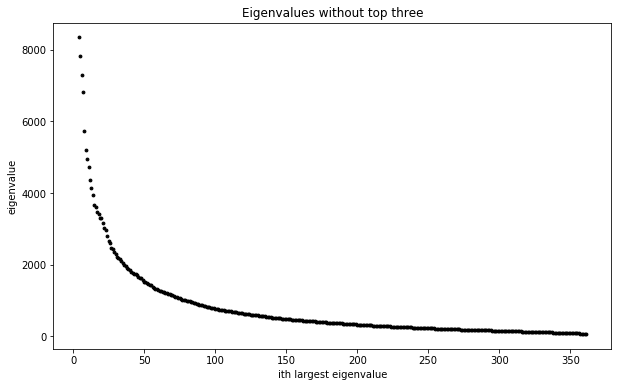

In [7]:
eigenvals = Xpca.singular_values_[3:]
x = [i+4 for i in range(len(eigenvals))]
plt.scatter(x, eigenvals, s=8, color='k')
plt.xlabel('ith largest eigenvalue')
plt.ylabel('eigenvalue')
plt.title('Eigenvalues without top three')

### Part b

Text(0.5, 1.0, 'Faces Projections')

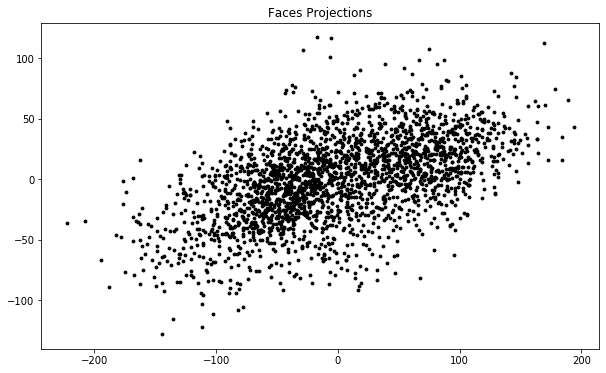

In [45]:
PX = Xpca.components_[:, 1:3]
X_proj = np.matmul(PX.T, XX.T).T
plt.scatter(X_proj[:, 0], X_proj[:, 1], s=8, color='k')
plt.title("Faces Projections")

### Part c

Text(0.5, 1.0, 'Faces and Background Projections')

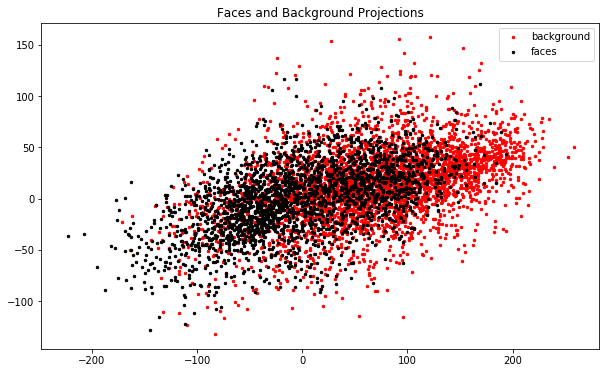

In [47]:
# project to same eigenvectors as in previous part
Y_proj = np.matmul(PX.T, YY.T).T
plt.scatter(Y_proj[:, 0], Y_proj[:, 1], s=6, color='r', label='background')
plt.scatter(X_proj[:, 0], X_proj[:, 1], s=6, color='k', label='faces')
plt.legend(loc="upper right")
plt.title("Faces and Background Projections")

### Part d

In [10]:
def dist(u1, u2, p):
    a1 = np.dot(p, u1)/np.dot(u1, u1)
    a2 = np.dot(p, u2)/np.dot(u2, u2)
    p0 = a1*u1 + a2*u2
    return np.sqrt(sum((p - p0)**2))

We now plot distance of points to palne spanned by second and third largest eigenvalue vs coordinate of projection via largest eigenvalue.

Text(0.5, 1.0, 'Distance to plane vs cooridinate of largest eigenvalue')

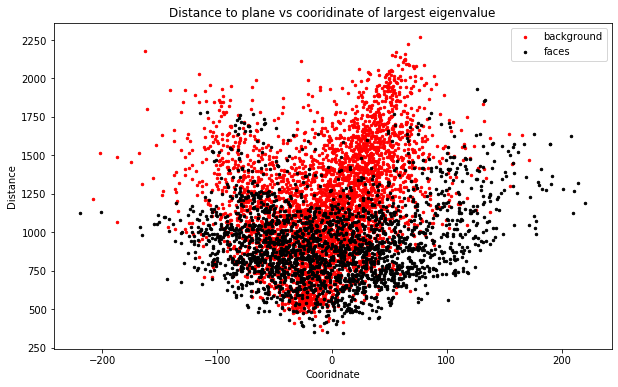

In [49]:
# orthoganl eigenvectors that span plane
u1 = Xpca.components_[:, 1]
u2 = Xpca.components_[:, 2]

YY_dists = [dist(u1, u2, p) for p in YY[:]]
# project to largest eigenvalue
PY = Ypca.components_[:, 0]
Y_proj = np.matmul(PY.T, YY.T).T
plt.scatter(Y_proj, YY_dists, s=6, color='r', label='background')

XX_dists = [dist(u1, u2, p) for p in XX[:]]
# project to largest eigenvalue
PX = Xpca.components_[:, 0]
X_proj = np.matmul(PX.T, XX.T).T
plt.scatter(X_proj, XX_dists, s=6, color='k', label='faces')

plt.legend(loc="upper right")
plt.xlabel("Cooridnate")
plt.ylabel("Distance")
plt.title("Distance to plane vs cooridinate of largest eigenvalue")

### Part e

We now plot distance of points to palne spanned by second and third largest eigenvalue vs coordinate of projection via second largest eigenvalue.

Text(0.5, 1.0, 'Distance to plane vs cooridinate of second largest eigenvalue')

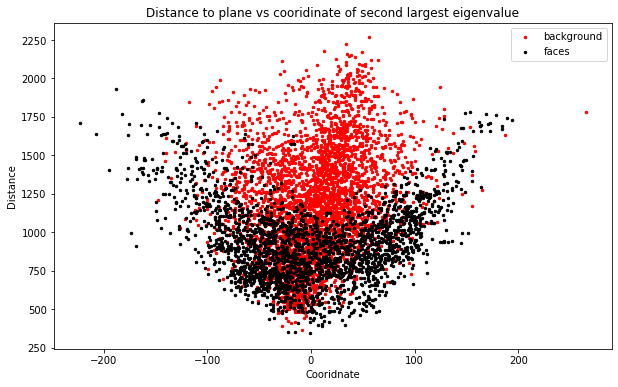

In [50]:
# orthoganl eigenvectors that span plane
u1 = Xpca.components_[:, 1]
u2 = Xpca.components_[:, 2]

YY_dists = [dist(u1, u2, p) for p in YY[:]]
# project to second largest eigenvalue
PY = Ypca.components_[:, 1]
Y_proj = np.matmul(PY.T, YY.T).T
plt.scatter(Y_proj, YY_dists, s=6, color='r', label='background')

XX_dists = [dist(u1, u2, p) for p in XX[:]]
# project to second largest eigenvalue
PX = Xpca.components_[:, 1]
X_proj = np.matmul(PX.T, XX.T).T
plt.scatter(X_proj, XX_dists, s=6, color='k', label='faces')

plt.legend(loc="upper right")
plt.xlabel("Cooridnate")
plt.ylabel("Distance")
plt.title("Distance to plane vs cooridinate of second largest eigenvalue")

## References

[1] Class Notes